# this application searches and analyzes the sentiment and polarity of specific words on twitter

In [1]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt

# setting API and Token keys 

In [2]:
consumer_key="ChqbXNsxe4cSOJ6g8aMpEPaOB"
consumer_key_secret="rOCOuYmiiktMMy9Xtfk3uGSuw0VQdNMPLksfjGedlmwdGPYlP5"
access_token="1151815744096821248-Z4UjrRrJp9DGauGerItOkJZa7eSdpD"
access_token_secret="OSZqT7iIx0ZhY1W6HVjOAfnGOdSoW6McfEpcVr9jtb4O4"

# API authentication

In [3]:
authentication= tweepy.OAuthHandler(consumer_key=consumer_key,consumer_secret=consumer_key_secret)
authentication.set_access_token(access_token,access_token_secret)

In [4]:
api=tweepy.API(authentication)

# Asking the user to enter a word or many words to search for 

In [616]:
search_term=input("You want me to search in twitter for: ")

You want me to search in twitter for: war


# Asking the user to enter the number of tweets to search for 

In [617]:
n_search_terms=int(input("How many tweets you want?"))

How many tweets you want?10000


# searching in twitter for the given word

In [618]:
tweets=tweepy.Cursor(api.search,q=search_term,lang="English").items(n_search_terms)

# declaring the needed variables 

In [619]:
positive=0
negative=0
neutral=0
polarity=0
#type(tweets)

# finding the polarity of each tweet and assigning it to the appropriate variable 

In [620]:
for tweet in tweets:
    print(tweet.text)
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if analysis.sentiment.polarity==0:
        neutral+=1
    elif analysis.sentiment.polarity>=0:
        positive+=1
    elif analysis.sentiment.polarity<=0:
        negative+=1
try:        
    if positive !=0 and negative!=0 and neutral!=0:
        print("searching")
except:        
    raise ValueError("I can not find the word you want, please try another one :) ")
negative    

RT @OGR_EN: Recent studies argue that Americans are relatively insensitive to the laws of war. There’s only one problem: that conclusion is…
Recent studies argue that Americans are relatively insensitive to the laws of war. There’s only one problem: that c… https://t.co/lnea82vwHC


0

# a Function to calculate the percentage of the given polarity 

In [621]:
def percentage(part):
    """ calculate the percentage of the given parameter (part)"""
    try:
        return (part/(positive+negative+neutral))*100
    except:
        print("I cant find the word you entered please try anaother one")

# getting the percentage of each polarity 

In [622]:
positive= percentage(positive)
negative= percentage(negative)
neutral= percentage(neutral)


# deciding the sentiment of all retrieved tweets 

In [623]:
if polarity>0:
    sentiment="Positive"
if polarity<0:
    sentiment="Negative"
if polarity==0:
    sentiment="Neutral"
sentiment    

'Neutral'

# offering a glimpse of how the people react to the given word 

In [624]:
print("Peolpe`s reaction to "+"'"+search_term+"'"+" is "+"'"+sentiment+"'"+" according to the analysis of "+str(n_search_terms)+" tweets" )

Peolpe`s reaction to 'war' is 'Neutral' according to the analysis of 10000 tweets


# a Pie chart represents the percentage of each polarity

In [625]:
labels=["Positive ["+str(positive)+"%]","Negative ["+str(negative)+"%]","Neutral ["+str(neutral)+"%]"]
sizes=[positive,negative,neutral]
color=["yellowgreen","red","gold"]

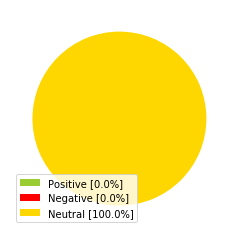

In [626]:
try:
    patches,text=plt.pie(sizes,colors=color,startangle=90)
    plt.legend(patches,labels,loc="best")
except:
    print("I cant find the word you entered please try anaother one")